Random Forest Model - Classification and Regression (Smart Farming Kano)
Dataset: https://github.com/OmdenaAI/KanoNigeriaChapter_SmartFarming/blob/main/Dataset_Merged/KanoState.csv

This implements two Random Forest models for the Merged_datatset in smart farming:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import requests
from io import StringIO

In [2]:
# Function to load dataset from GitHub raw URL
from datetime import datetime
import requests
from io import StringIO
import warnings
def load_data_from_github():
    url = "https://raw.githubusercontent.com/OmdenaAI/KanoNigeriaChapter_SmartFarming/main/Dataset_Merged/KanoState.csv"
    response = requests.get(url)
    response.raise_for_status()  # Check for HTTP errors
    df = pd.read_csv(StringIO(response.text))
    return df

# Load the dataset
df = load_data_from_github()
print("Dataset loaded successfully. Shape:", df.shape)

Dataset loaded successfully. Shape: (148666, 17)


In [3]:
df.head()

,date,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Minimum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,SUB_REGION,LGA,LAT,LON
0,2014-01-01,19.85,30.76,10.57,15.35,0.0,1.71,3.28,0.87,58.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
1,2014-01-02,20.26,29.80,12.54,13.38,0.0,2.06,3.51,1.18,60.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2,2014-01-03,20.19,29.34,13.32,15.11,0.0,2.49,4.55,1.33,60.1,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
3,2014-01-04,20.22,29.90,12.63,18.16,0.0,2.47,4.54,1.33,67.7,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
4,2014-01-05,19.88,28.37,12.65,21.71,0.0,2.27,3.93,1.12,69.3,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.dtypes

,0
date,object
Temperature_at_2-Meters (C),float64
Temperature_at_2_Meters_Minimum (C),float64
Temperature-at_2_Meters_Minimum (C),float64
Relative_Humidity_at_2_Meters (%),float64
Precipitation (mm/day),float64
Wind_Speed_at_2_Meters (m/s),float64
Wind_Speed_at_2_Meters_Maximum (m/s),float64
Wind_Speed_at_2_Meters_Minimum (m/s),float64
Wind_Direction_at_2_Meters (Degrees),float64


In [6]:
df.describe()

,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Minimum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,LAT,LON
count,148666.000000,148666.00000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000
mean,25.992740,33.69716,19.550714,47.447771,2.500358,1.522798,2.653557,0.712745,139.982081,0.333260,0.347926,0.372556,11.865149,8.484854
std,4.057896,4.20725,4.665065,23.155084,11.209751,0.774304,1.312185,0.494539,89.684296,0.175456,0.135656,0.149124,0.327158,0.346528
min,12.750000,17.40000,5.360000,4.970000,0.000000,0.100000,0.210000,0.000000,0.100000,0.070000,0.150000,0.160000,10.880000,7.820000
25%,23.670000,30.52000,15.920000,26.240000,0.000000,0.960000,1.680000,0.350000,61.100000,0.190000,0.250000,0.270000,11.670000,8.250000
50%,26.150000,33.58000,21.200000,46.890000,0.000000,1.410000,2.520000,0.620000,98.100000,0.290000,0.310000,0.330000,11.860000,8.430000
75%,28.950000,36.83000,22.880000,67.760000,1.080000,1.990000,3.490000,0.980000,229.100000,0.440000,0.400000,0.420000,12.100000,8.750000
max,35.930000,44.20000,29.460000,95.120000,857.190000,5.420000,8.440000,3.870000,359.900000,0.990000,1.000000,1.000000,12.500000,9.140000


In [7]:
# Create the target variable based on soil moisture
df['Plant_Indicator'] = df['Profile_Soil_Moisture'].apply(lambda x: 1 if 0.3 <= x <= 0.4 else 0)

In [8]:
print(df['Plant_Indicator'].value_counts())

Plant_Indicator
0    97880
1    50786
Name: count, dtype: int64


In [9]:
# Preprocessing
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create the target variable based on soil moisture
df['Plant_Indicator'] = df['Profile_Soil_Moisture'].apply(lambda x: 1 if 0.3 <= x <= 0.4 else 0)

# Lag features for soil moisture
df['Soil_Moisture_Lag1'] = df['Profile_Soil_Moisture'].shift(1)
df['Soil_Moisture_Lag2'] = df['Profile_Soil_Moisture'].shift(2)
df['Soil_Moisture_Lag3'] = df['Profile_Soil_Moisture'].shift(3)

# Rolling statistics for precipitation
df['Precip_Rolling_Mean'] = df['Precipitation (mm/day)'].rolling(window=3, min_periods=1).mean()

# Temperature range (difference between max and min temperature)
df['Temp_Range'] = df['Temperature_at_2-Meters (C)'] - df['Temperature_at_2_Meters_Minimum (C)']

# Rolling mean for temperature (7-day window)
df['Temperature_Rolling_Mean'] = df['Temperature_at_2-Meters (C)'].rolling(7).mean()
df['Temperature_Rolling_Std'] = df['Temperature_at_2-Meters (C)'].rolling(7).std()

# Rolling statistics for humidity
df['Humidity_Rolling_Mean'] = df['Relative_Humidity_at_2_Meters (%)'].rolling(7).mean()
df['Humidity_Rolling_Std'] = df['Relative_Humidity_at_2_Meters (%)'].rolling(7).std()

# Fill NaN values after rolling or shifting
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)  # Drop rows with remaining NaN values

<ipython-input-9-c803bb1841da>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [11]:
df.describe()

,date,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Minimum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),...,Plant_Indicator,Soil_Moisture_Lag1,Soil_Moisture_Lag2,Soil_Moisture_Lag3,Precip_Rolling_Mean,Temp_Range,Temperature_Rolling_Mean,Temperature_Rolling_Std,Humidity_Rolling_Mean,Humidity_Rolling_Std
count,148660,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,...,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000,148660.000000
mean,2019-07-02 13:56:35.226691584,25.992979,33.697334,19.550997,47.448967,2.500459,1.522769,2.653504,0.712726,139.985108,...,0.341625,0.372562,0.372561,0.372560,2.500459,-7.704355,25.992993,0.992086,47.448527,5.039827
min,2014-01-01 00:00:00,12.750000,17.400000,5.360000,4.970000,0.000000,0.100000,0.210000,0.000000,0.100000,...,0.000000,0.160000,0.160000,0.160000,0.000000,-13.680000,14.037143,0.081533,6.918571,0.274998
25%,2016-10-01 00:00:00,23.670000,30.520000,15.920000,26.250000,0.000000,0.960000,1.680000,0.350000,61.100000,...,0.000000,0.270000,0.270000,0.270000,0.000000,-9.520000,23.758571,0.647231,26.818571,2.507901
50%,2019-07-03 00:00:00,26.150000,33.580000,21.200000,46.890000,0.000000,1.410000,2.520000,0.620000,98.100000,...,0.000000,0.330000,0.330000,0.330000,0.010000,-7.910000,26.142857,0.905030,46.857143,4.254941
75%,2022-04-02 00:00:00,28.950000,36.840000,22.880000,67.760000,1.080000,1.990000,3.490000,0.980000,229.100000,...,1.000000,0.420000,0.420000,0.420000,1.950833,-5.930000,28.890000,1.239912,67.305714,6.641562
max,2024-12-31 00:00:00,35.930000,44.200000,29.460000,95.120000,857.190000,5.420000,8.440000,3.870000,359.900000,...,1.000000,1.000000,1.000000,1.000000,292.296667,-1.080000,34.681429,3.403823,92.117143,28.017741
std,NaN,4.057803,4.207242,4.664943,23.154775,11.209966,0.774304,1.312181,0.494538,89.684834,...,0.474256,0.149123,0.149124,0.149124,7.805189,2.270510,3.928589,0.468447,22.467994,3.342579


In [12]:
# Encode 'SUB_REGION' as a categorical feature using LabelEncoder
le = LabelEncoder()
df['SUB_REGION'] = le.fit_transform(df['SUB_REGION'])

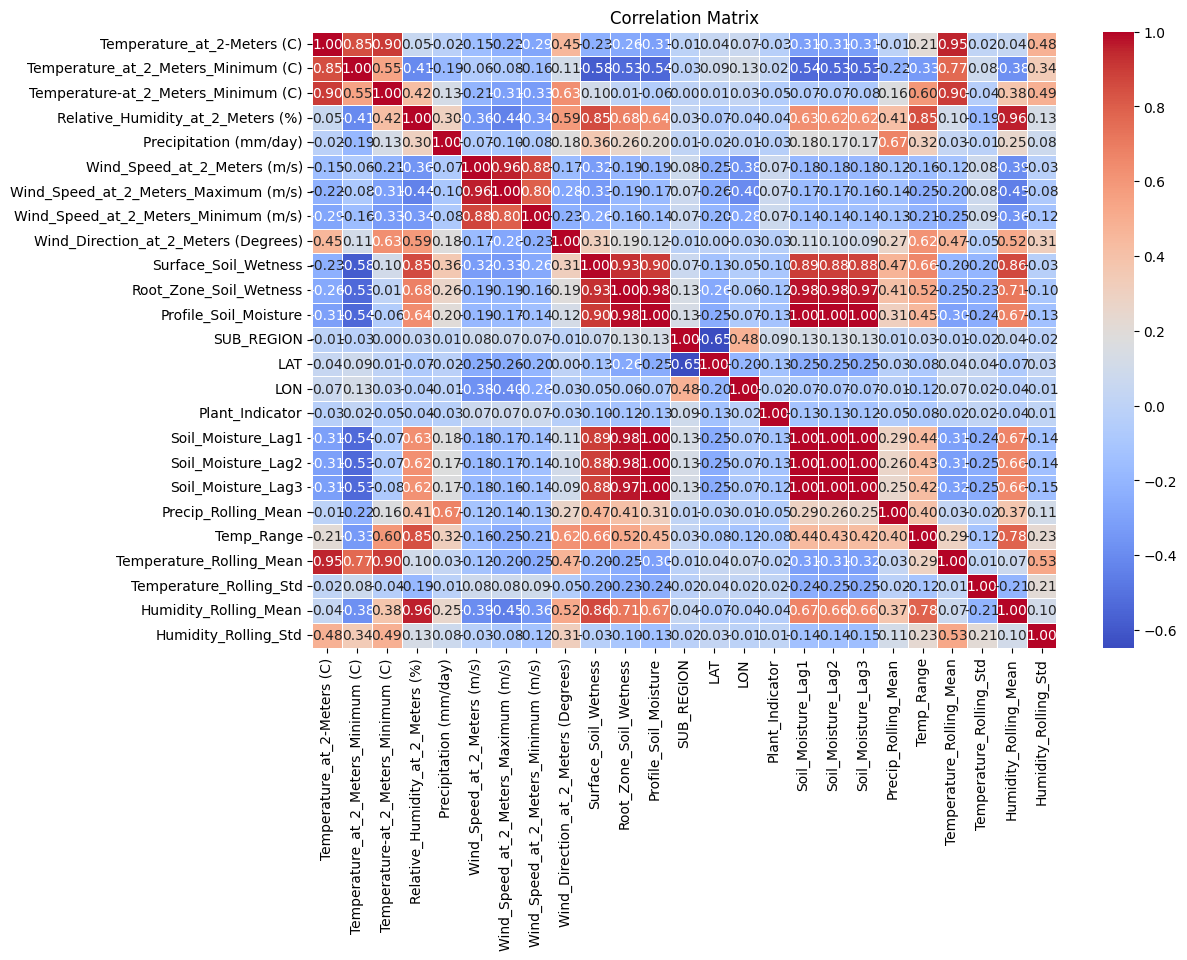

In [13]:
# Visualizing the correlation matrix

# Convert the 'date' column to datetime format if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [14]:
df.columns

Index(['date', 'Temperature_at_2-Meters (C)',
       'Temperature_at_2_Meters_Minimum (C)',
       'Temperature-at_2_Meters_Minimum (C)',
       'Relative_Humidity_at_2_Meters (%)', 'Precipitation (mm/day)',
       'Wind_Speed_at_2_Meters (m/s)', 'Wind_Speed_at_2_Meters_Maximum (m/s)',
       'Wind_Speed_at_2_Meters_Minimum (m/s)',
       'Wind_Direction_at_2_Meters (Degrees)', 'Surface_Soil_Wetness',
       'Root_Zone_Soil_Wetness', 'Profile_Soil_Moisture', 'SUB_REGION', 'LGA',
       'LAT', 'LON', 'Plant_Indicator', 'Soil_Moisture_Lag1',
       'Soil_Moisture_Lag2', 'Soil_Moisture_Lag3', 'Precip_Rolling_Mean',
       'Temp_Range', 'Temperature_Rolling_Mean', 'Temperature_Rolling_Std',
       'Humidity_Rolling_Mean', 'Humidity_Rolling_Std'],
      dtype='object')

In [15]:
X = df[['Soil_Moisture_Lag1', 'Soil_Moisture_Lag2', 'Soil_Moisture_Lag3', 'Precip_Rolling_Mean', 'Temp_Range',
        'Temperature_Rolling_Mean', 'Temperature_Rolling_Std', 'Humidity_Rolling_Mean', 'Humidity_Rolling_Std',
        'Surface_Soil_Wetness', 'SUB_REGION', 'Wind_Speed_at_2_Meters (m/s)',
        'Wind_Direction_at_2_Meters (Degrees)', 'Surface_Soil_Wetness',
        'Root_Zone_Soil_Wetness']]
y = df['Plant_Indicator']

In [16]:
# Standardize the features (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [87]:
# # Step 4: Scale the features using StandardScaler (important for models like Random Forest)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [31]:
# Apply SMOTE to balance the dataset (oversampling the minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [32]:
# Train the Random Forest Classifier on the balanced data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [33]:
# Make Predictions
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9995067043365173


In [35]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29352
           1       1.00      1.00      1.00     15246

    accuracy                           1.00     44598
   macro avg       1.00      1.00      1.00     44598
weighted avg       1.00      1.00      1.00     44598



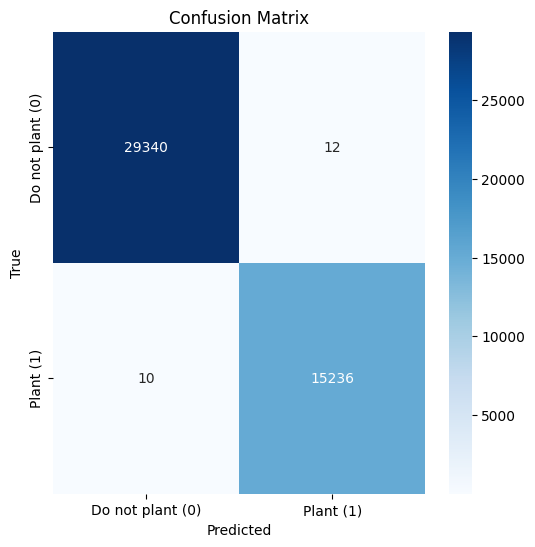

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Do not plant (0)", "Plant (1)"], yticklabels=["Do not plant (0)", "Plant (1)"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [37]:
# Evaluate cross-validation score on the training data (with SMOTE applied)

cv_scores_train = cross_val_score(clf, X_train_smote, y_train_smote, cv=5)
print(f"Cross-validated scores (Training Data): {cv_scores_train}")
print(f"Mean cross-validation score (Training Data): {cv_scores_train.mean()}")

Cross-validated scores (Training Data): [0.99850414 0.99886898 0.99927031 0.99970813 0.99952569]
Mean cross-validation score (Training Data): 0.9991754498572434


In [38]:
if cv_scores_train.mean() > test_accuracy:
    print("The model may be overfitting (Training performance is higher than test performance).")
else:
    print("The model is not overfitting (Training and test performance are similar).")

The model is not overfitting (Training and test performance are similar).


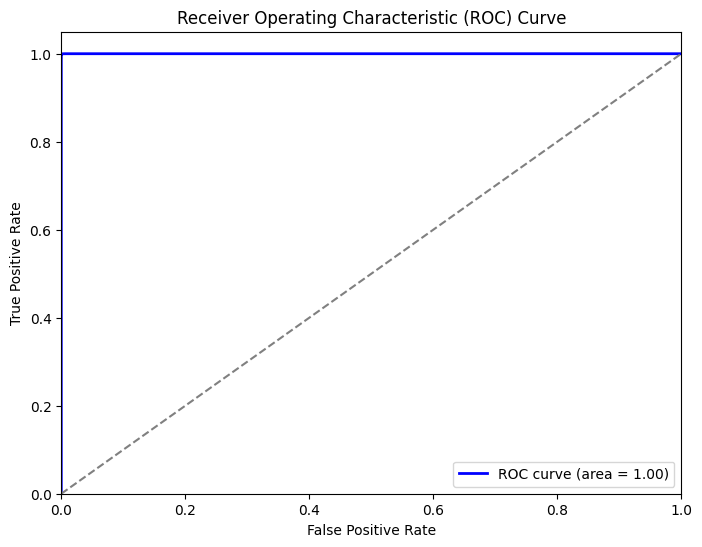

In [39]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Set up hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

In [ ]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")